## Intelligence artificielle et raisonnement TP1


Considérons le jeu du taquin suivant où il s’agit de passer de l’état initial (à gauche) à l’état final (à droite)


In [ ]:
from IPython import display
display.Image("jeu_taquin.png")

En utilisant le langage Python, on vous demande de :

    1. Coder de manière générique les états, les actions, la fonction de transition d’états, l’état initial et les états finaux d’un problème de recherche dans un graphe d’états.


In [2]:
class Taquin:
    def __init__(self, initial_state):
        self.state = initial_state

    def __str__(self):
        return "\n".join([" ".join(map(str, row)) for row in self.state])

    def move(self, direction):
        # Recherche des coordonnées de la tuile vide (représentée par 0)
        empty_tile_row, empty_tile_col = None, None


        # Déplacement de la tuile vide dans la direction spécifiée
        


    def is_goal(self):
        # Vérifie si la configuration actuelle est le but (puzzle résolu)
        # Implémentez ici la logique pour vérifier si le puzzle est résolu
        

In [ ]:
# Exemple d'utilisation
initial_state = [[7,2,4],[5,0,6],[8,3,1]]  # 0 représente la tuile vide

#initialiser le taquin


# Déplacez la tuile dans des directions différentes

    2. Coder de manière générique les algorithmes :
        a. Recherche en profondeur limitée
        b. Recherche par profondeur itérative
        c. Recherche A*


#### Recherche par profondeur


#Pseudocode

DFS(G, u)

    u.visited = true

    for each v ∈ G.Adj[u]

        if v.visited == false

            DFS(G,v)

init() {

    For each u ∈ G

        u.visited = false

     For each u ∈ G

       DFS(G, u)

}


In [3]:
graph = {
  '5' : ['3','7'],
  '3' : ['2', '4'],
  '7' : ['8'],
  '2' : [],
  '4' : ['8'],
  '8' : []
}

visited = set() # Set to keep track of visited nodes of graph.

def dfs(visited, graph, node): #function for dfs 
  print(node)
  for neighbour in graph[node]:
      if neighbour not in visited:
          visited.add(neighbour)
          dfs(visited, graph, neighbour)
    
dfs(visited, graph, '5')

5
3
2
4
8
7


Explanation

    Lines 2-9: The illustrated graph is represented using an adjacency list - an easy way to do it in Python is to use a dictionary data structure. Each vertex has a list of its adjacent nodes stored.
    Line 11: visited is a set that is used to keep track of visited nodes.
    Line 21: The dfs function is called and is passed the visited set, the graph in the form of a dictionary, and A, which is the starting node.
    Lines 13-18: dfs follows the algorithm described above:
        It first checks if the current node is unvisited - if yes, it is appended in the visited set.
        Then for each neighbor of the current node, the dfs function is invoked again.
        The base case is invoked when all the nodes are visited. The function then returns.


#### Recherche par profondeur limitée


In [16]:
graph = {
  '5' : ['3','7'],
  '3' : ['2', '4'],
  '7' : ['8'],
  '2' : [],
  '4' : ['8'],
  '8' : []
}

visited = set() # Set to keep track of visited nodes of graph.

def dfs_limited(visited, graph, node, limit): #function for dfs 
    print(node)
    for neighbour in graph[node]:
        if neighbour not in visited and limit > 0:
            visited.add(neighbour)
            dfs_limited(visited, graph, neighbour, limit-1)

dfs_limited(visited, graph, '5', 2)

5
3
2
4
7
8


#### Recherche par profondeur itérative


In [34]:
graph = {
  '0' : ['1','2','4'],
  '1' : ['3', '5'],
  '2' : ['6'],
  '3' : [],
  '4' : ['5'],
  '5' : ['1'],
  '6' : []
}

visited = set() # Set to keep track of visited nodes of graph.

# iterative implementation of dfs
def dfs_iterative( graph, node, limit ):
  visited = []
  stack = [(node,0)]
  while stack:
      v= stack.pop()
      node = v[0]
      dep = v[1]
      if node not in visited and dep <= limit :
          print(v)
          visited.append(node)
          neighbors = [(i,dep+1) for i in graph[node]]
          stack.extend(neighbors)
  return visited

print(dfs_iterative(graph, '0', 3))

('0', 0)
('4', 1)
('5', 2)
('1', 3)
('2', 1)
('6', 2)
['0', '4', '5', '1', '2', '6']


## Recherche A\*


In [13]:
# implementation of A* algorithm
graph = {
  'A' : [('B',8),('F',6)],
  'B' : [('C',4),('D',2)],
  'C' : [('D',3),('G',9)],
  'D' : [('E',5),('G',7)],
  'E' : [],
  'F' : [('G',3)],
  'G' : []
}

from queue import PriorityQueue

def astar(graph, start, goal):
    visited = set()
    queue = PriorityQueue()
    queue.put((0, start))
    while queue:
        cost, node = queue.get()
        if node not in visited:
            visited.add(node)

            if node == goal:
                return visited

            for i in graph[node]:
                if i[0] not in visited:
                    total_cost = cost + i[1]
                    queue.put((total_cost, i[0]))


print(astar(graph, 'A', 'G'))

{'B', 'A', 'F', 'G'}


    3. Instancier avec le problème du Taquin en utilisant 2 heuristiques admissibles vues en cours 


### Bidirectional A\*:

An enhancement to A* is the Bidirectional A* algorithm, which runs two A* searches simultaneously from the start and goal nodes. When both searches meet in the middle, the path is found. This can be more efficient than a single A* search in certain situations.


In [14]:
def manhattan_distance(node, target):
    return abs(node.x - target.x) + abs(node.y - target.y)

In [15]:
def bidirectional_a_star(graph, start, goal):
    def heuristic(node, target):
        return manhattan_distance(node, target)

    def reconstruct_path(came_from, current):
        path = [current]
        while current in came_from:
            current = came_from[current]
            path.append(current)
        return path

    def a_star_search(graph, start, goal, h):
        open_set = set([start])
        came_from = {}
        g_score = {node: float('inf') for node in graph}
        g_score[start] = 0

        f_score = {node: float('inf') for node in graph}
        f_score[start] = h(start, goal)

        while open_set:
            current = min(open_set, key=lambda node: f_score[node])
            if current == goal:
                return reconstruct_path(came_from, current)
            
            open_set.remove(current)
            
            for neighbor, cost in graph[current].items():
                tentative_g = g_score[current] + cost
                if tentative_g < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score[neighbor] = g_score[neighbor] + h(neighbor, goal)
                    if neighbor not in open_set:
                        open_set.add(neighbor)
        
        return None

    forward_path = a_star_search(graph, start, goal, heuristic)
    backward_path = a_star_search(graph, goal, start, heuristic)

    if forward_path and backward_path:
        backward_path.reverse()
        return forward_path + backward_path[1:]
    else:
        return None


In [24]:
class Node:
    def __init__(self, x, y, name):
        self.x = x
        self.y = y
        self.name = name

    def __hash__(self):
        return hash((self.x, self.y))

    def __eq__(self, other):
        return isinstance(other, Node) and self.x == other.x and self.y == other.y
    
    def __str__(self):
        return self.name

In [28]:
graph = {
    Node(0, 0,'A'): {Node(1, 0,'B'): 1, Node(0, 1,'D'): 1},
    Node(1, 0,'B'): {Node(0, 0,'A'): 1, Node(2, 0,'C'): 1},
    Node(2, 0,'C'): {Node(1, 0,'B'): 1, Node(2, 1,'F'): 1},
    Node(0, 1,'D'): {Node(0, 0,'A'): 1, Node(1, 1,'E'): 1},
    Node(1, 1,'E'): {Node(0, 1,'D'): 1, Node(1, 2,'G'): 1},
    Node(2, 1,'F'): {Node(2, 0,'C'): 1, Node(2, 2,'G'): 1},
    Node(1, 2,'G'): {Node(1, 1,'E'): 1, Node(2, 2,'G'): 1},
    Node(2, 2,'G'): {Node(1, 2,'G'): 1},
}

start_node = Node(0, 0, 'A')
goal_node = Node(2, 2,'G')

path = bidirectional_a_star(graph, start_node, goal_node)

if path:
    print("Path found:", [node.name for node in path])
else:
    print("No path found")

Path found: ['G', 'F', 'C', 'B', 'A', 'G', 'E', 'D', 'A']


    4. Comparer les algorithmes à l’aide d’un graphique :  nombre de nœuds traités, taille maximale de la liste des nœuds candidats (ouverts)


### Comparaison des algorithmes:


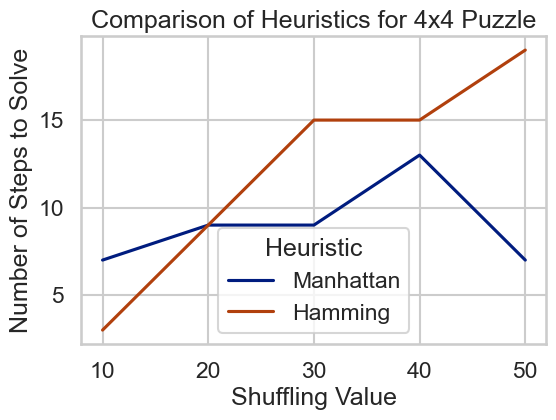

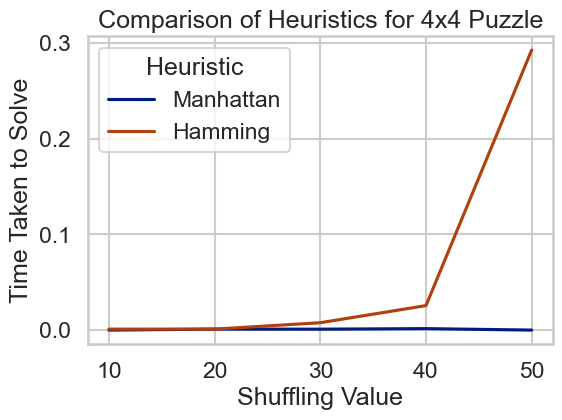

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../results.csv')

puzzle_size = 4
shuffling_value = 10  
filtered_df = df[(df['Puzzle_size'] == puzzle_size)]

plt.figure(figsize=(6, 4))
sns.lineplot(x="Number of shuffles", y="Number_of_moves",hue="Heuristic" ,data=filtered_df, errorbar=None)
plt.title(f"Comparison of Heuristics for {puzzle_size}x{puzzle_size} Puzzle")
plt.xlabel("Shuffling Value")
plt.ylabel("Number of Steps to Solve")

plt.figure(figsize=(6, 4))
sns.lineplot(x="Number of shuffles", y="Time",hue="Heuristic" ,data=filtered_df, errorbar=None)
plt.title(f"Comparison of Heuristics for {puzzle_size}x{puzzle_size} Puzzle")
plt.xlabel("Shuffling Value")
plt.ylabel("Time Taken to Solve")
plt.show()


### Interpretation:

       1. Number of Moves (Steps) to Solve:

In the graph comparing the number of moves for the 4x4 puzzle, we observed that the Manhattan heuristic generally requires fewer moves than the Hamming heuristic for each shuffling value.
This suggests that, on average, the Manhattan heuristic leads to a more efficient solution in terms of the number of moves required to solve the puzzle.

        2.Time to Solve:

The graph for time needed to solve the 4x4 puzzle may also show that the Manhattan heuristic is faster than the Hamming heuristic.
The Manhattan heuristic tends to find a solution more quickly, as indicated by the shorter bars or lower curve for Manhattan compared to Hamming.

       3. Conclusion:

Based on the provided information, it seems that the Manhattan heuristic outperforms the Hamming heuristic for the 4x4 puzzle in terms of both the number of moves and the time needed to find a solution.
The efficiency of heuristics can vary depending on the specific characteristics of the puzzle, and these results are specific to the 4x4 puzzle with the shuffling values considered.

        4.Considerations:

It's essential to note that the efficiency of heuristics may vary for different puzzle sizes, and these observations are specific to the 4x4 puzzle. For a comprehensive understanding, we may want to explore similar comparisons for other puzzle sizes.


    5. Augmenter la taille du jeu du Taquin (4x4, 7x7, 10x10). Comparer les algorithmes en fonction de l’évolution de la taille.


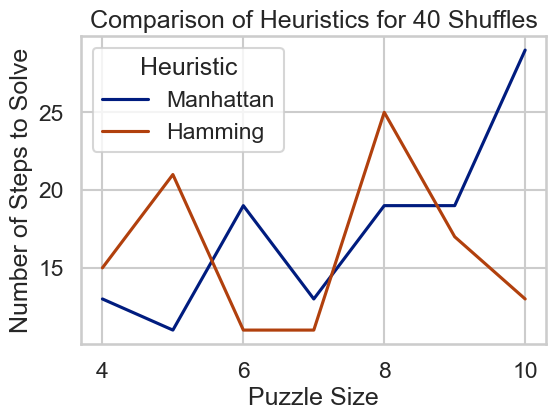

In [54]:
df = pd.read_csv('../results.csv')

puzzle_sizes=[4,5,6,7,8,9,10]
shuffling_value = 40

filtered_df = df[(df['Number of shuffles'] == shuffling_value)]

plt.figure(figsize=(6, 4))
sns.lineplot(x="Puzzle_size", y="Number_of_moves",hue="Heuristic" ,data=filtered_df, errorbar=None)
plt.title(f"Comparison of Heuristics for {shuffling_value} Shuffles")
plt.xlabel("Puzzle Size")
plt.ylabel("Number of Steps to Solve")
plt.show()


### Interpretation:

       1. X-Axis (Puzzle Size):

The x-axis represents different puzzle sizes, ranging from 4x4 to 10x10. As the puzzle size increases, the number of tiles and complexity of the puzzle also increase.

        2. Y-Axis (Number of Steps to Solve):

The y-axis represents the number of steps (moves) required to solve the puzzle. Each point on the graph corresponds to a specific puzzle size, and the height of the point indicates the average number of steps needed to solve the puzzle with 40 shuffles.

        3.Manhattan Heuristic:

The line or curve for the Manhattan heuristic is ascending, meaning that as the puzzle size increases, the average number of steps needed to solve the puzzle also increases.
This behavior may be attributed to the increased complexity and larger search space of the puzzle as its size grows. The Manhattan heuristic, while effective, may face more challenges in finding efficient solutions as the puzzle becomes larger.

        4.Interpretation:

The ascending trend in the Manhattan heuristic suggests that as the puzzle size expands, it becomes more challenging to find a solution with fewer steps using this heuristic.
The increasing number of steps could be due to the larger number of possible configurations and increased difficulty in navigating the search space.

        5.Comparison with Hamming Heuristic:

If the Hamming heuristic also shows an ascending trend, it indicates that both heuristics face increased difficulty as the puzzle size grows. However, if the Hamming heuristic exhibits a different trend, it could imply that one heuristic is more robust for larger puzzle sizes.

